In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [7]:
import pandas as pd
from pymongo import MongoClient
from bson.json_util import dumps


client = MongoClient("mongodb://localhost:27017/")
db = client["db"]
collection = db["dataset"]


# empty collection
# collection.delete_many({})
# print(f"Collection size: {collection.estimated_document_count()}")

data_path = "dataset.csv"
data = pd.read_csv(data_path, encoding="latin")


records = data.to_dict("records")
collection.delete_many({})
collection.insert_many(records)

Collection size: 0


/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_40057/1629627273.py:16: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path, encoding="latin")


InsertManyResult([ObjectId('66313b02f43e8671eac6a5bb'), ObjectId('66313b02f43e8671eac6a5bc'), ObjectId('66313b02f43e8671eac6a5bd'), ObjectId('66313b02f43e8671eac6a5be'), ObjectId('66313b02f43e8671eac6a5bf'), ObjectId('66313b02f43e8671eac6a5c0'), ObjectId('66313b02f43e8671eac6a5c1'), ObjectId('66313b02f43e8671eac6a5c2'), ObjectId('66313b02f43e8671eac6a5c3'), ObjectId('66313b02f43e8671eac6a5c4'), ObjectId('66313b02f43e8671eac6a5c5'), ObjectId('66313b02f43e8671eac6a5c6'), ObjectId('66313b02f43e8671eac6a5c7'), ObjectId('66313b02f43e8671eac6a5c8'), ObjectId('66313b02f43e8671eac6a5c9'), ObjectId('66313b02f43e8671eac6a5ca'), ObjectId('66313b02f43e8671eac6a5cb'), ObjectId('66313b02f43e8671eac6a5cc'), ObjectId('66313b02f43e8671eac6a5cd'), ObjectId('66313b02f43e8671eac6a5ce'), ObjectId('66313b02f43e8671eac6a5cf'), ObjectId('66313b02f43e8671eac6a5d0'), ObjectId('66313b02f43e8671eac6a5d1'), ObjectId('66313b02f43e8671eac6a5d2'), ObjectId('66313b02f43e8671eac6a5d3'), ObjectId('66313b02f43e8671eac6a5

In [10]:
documents = collection.find()
data_from_db = pd.DataFrame(list(documents))


data_from_db.drop("_id", axis=1, inplace=True)


data_info = data_from_db.info()
data_head = data_from_db.head()

print(data_info, data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None         eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3     

In [ ]:
# Terrorist Incident Classifier:
# It uses classification techniques to predict the type of terrorist event based on attributes like location and time.

# Selecting relevant features and the target variable
features = ["country", "region", "imonth", "iday"]
target = "attacktype1"

# Creating a subset of the data with the selected features and target
data_subset = data[features + [target]].dropna()

# Display basic information of the subset to ensure proper selection and check for missing values
data_subset_info = data_subset.info()
data_subset_head = data_subset.head()

data_subset_info, data_subset_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   country      181691 non-null  int64
 1   region       181691 non-null  int64
 2   imonth       181691 non-null  int64
 3   iday         181691 non-null  int64
 4   attacktype1  181691 non-null  int64
dtypes: int64(5)
memory usage: 6.9 MB


(None,
    country  region  imonth  iday  attacktype1
 0       58       2       7     2            1
 1      130       1       0     0            6
 2      160       5       1     0            1
 3       78       8       1     0            3
 4      101       4       1     0            7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data_subset[features], data_subset[target], test_size=0.2, random_state=42
)


random_forest = RandomForestClassifier(random_state=42)


random_forest.fit(X_train, y_train)


random_forest_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

print("Accuracy of Logistic Regression: ", random_forest_accuracy)

Accuracy of Logistic Regression:  0.49473017969674454


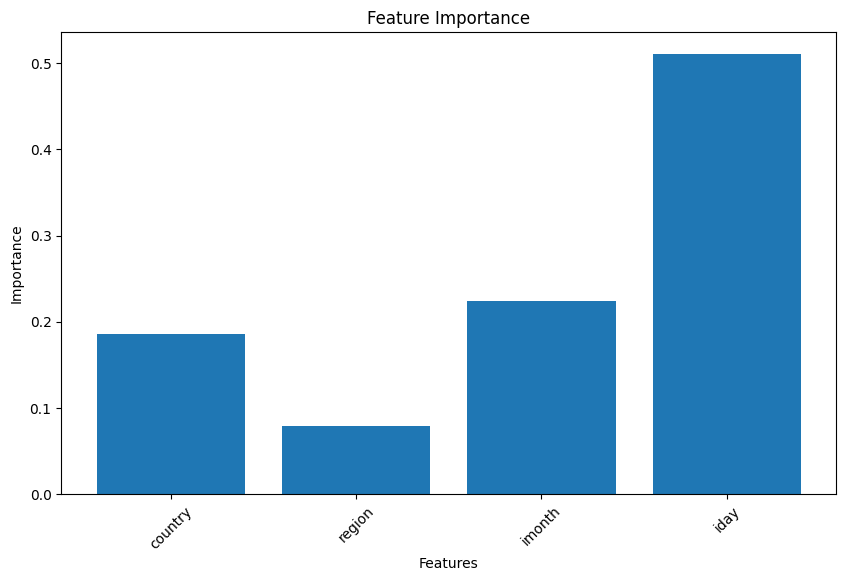

In [ ]:
feature_importances = random_forest.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), feature_importances)
plt.xticks(range(len(features)), features, rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

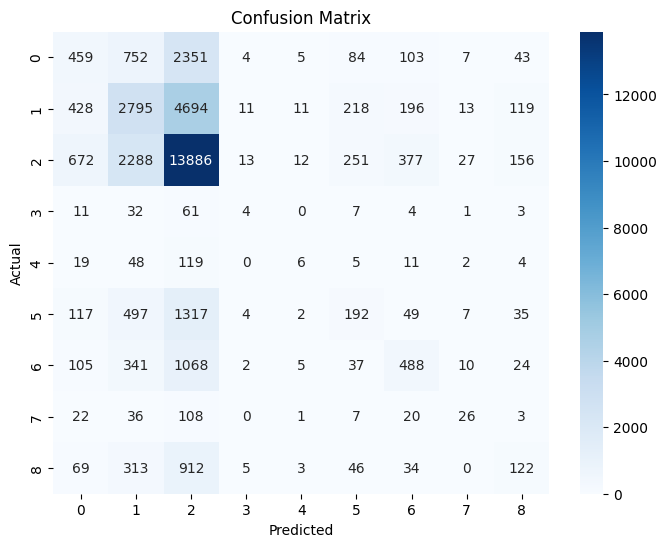

In [ ]:
cm = confusion_matrix(y_test, random_forest_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Attack Success Prediction Model:
# Model Name: "Attack Outcome Predictor"
# Objective: Predict whether a planned or actual terrorist attack will be successful based on historical data.
# Model Type: Binary classification
# Algorithms: Decision Trees, Naive Bayes, or Neural Networks.

# Displaying column names to identify a suitable target column for attack success
potential_targets = [col for col in data.columns if "success" in col.lower()]
potential_targets

['success']

In [ ]:
# Selecting features and target for the "Attack Outcome Predictor"
features_success_model = ["country", "region", "imonth", "iday", "attacktype1"]
target_success = "success"

# Creating a subset of the data with selected features and target, handling any missing data
data_success_subset = data[features_success_model + [target_success]].dropna()

# Checking the basic information of the new subset
data_success_subset_info = data_success_subset.info()
data_success_subset_head = data_success_subset.head()

data_success_subset_info, data_success_subset_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   country      181691 non-null  int64
 1   region       181691 non-null  int64
 2   imonth       181691 non-null  int64
 3   iday         181691 non-null  int64
 4   attacktype1  181691 non-null  int64
 5   success      181691 non-null  int64
dtypes: int64(6)
memory usage: 8.3 MB


(None,
    country  region  imonth  iday  attacktype1  success
 0       58       2       7     2            1        1
 1      130       1       0     0            6        1
 2      160       5       1     0            1        1
 3       78       8       1     0            3        1
 4      101       4       1     0            7        1)

In [ ]:
# Splitting the data
X_train_success, X_test_success, y_train_success, y_test_success = train_test_split(
    data_success_subset[features_success_model],
    data_success_subset[target_success],
    test_size=0.2,
    random_state=42,
)

# Scaling features
scaler = StandardScaler()
X_train_success_scaled = scaler.fit_transform(X_train_success)
X_test_success_scaled = scaler.transform(X_test_success)

In [ ]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
}

# Train models
for name, model in models.items():
    if name == "Naive Bayes":
        model.fit(X_train_success_scaled, y_train_success)
    else:
        model.fit(X_train_success, y_train_success)
    print(f"{name} has been trained.")

Decision Tree has been trained.
Naive Bayes has been trained.


In [ ]:
# Evaluate models
for name, model in models.items():
    predictions = model.predict(
        X_test_success_scaled if name == "Naive Bayes" else X_test_success
    )
    accuracy = accuracy_score(y_test_success, predictions)
    print(f"Accuracy of {name}: {accuracy:.4f}")

Accuracy of Decision Tree: 0.8581
Accuracy of Naive Bayes: 0.8723


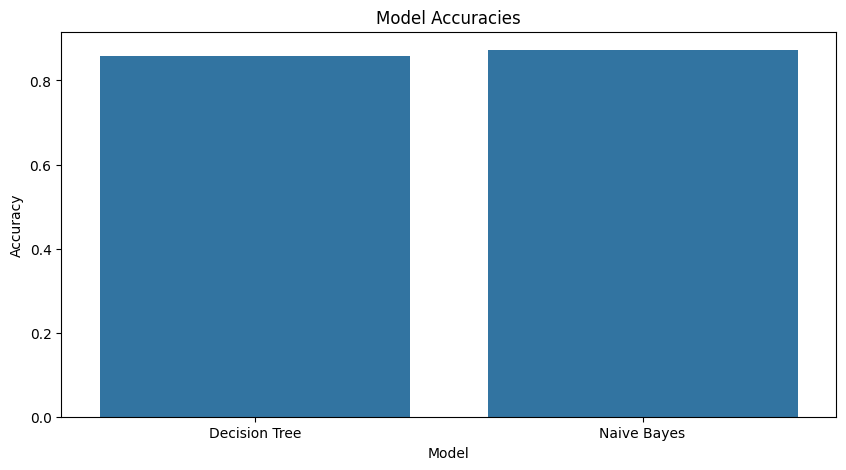

In [ ]:
# Collect accuracies
accuracies = [
    accuracy_score(
        y_test_success,
        model.predict(
            X_test_success_scaled if name == "Naive Bayes" else X_test_success
        ),
    )
    for name, model in models.items()
]

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=list(models.keys()), y=accuracies)
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

<Figure size 800x600 with 0 Axes>

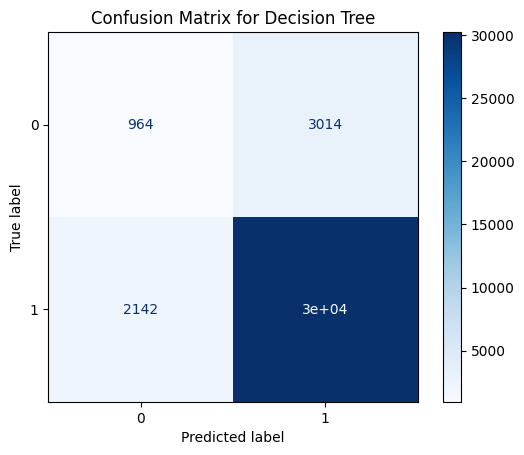

<Figure size 800x600 with 0 Axes>

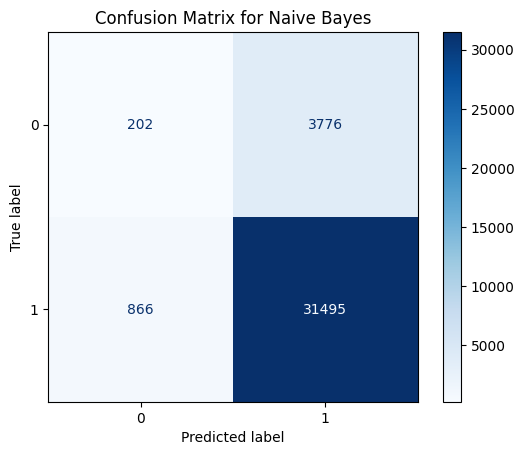

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for each model
for name, model in models.items():
    predictions = model.predict(
        X_test_success_scaled if name == "Naive Bayes" else X_test_success
    )
    cm = confusion_matrix(y_test_success, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

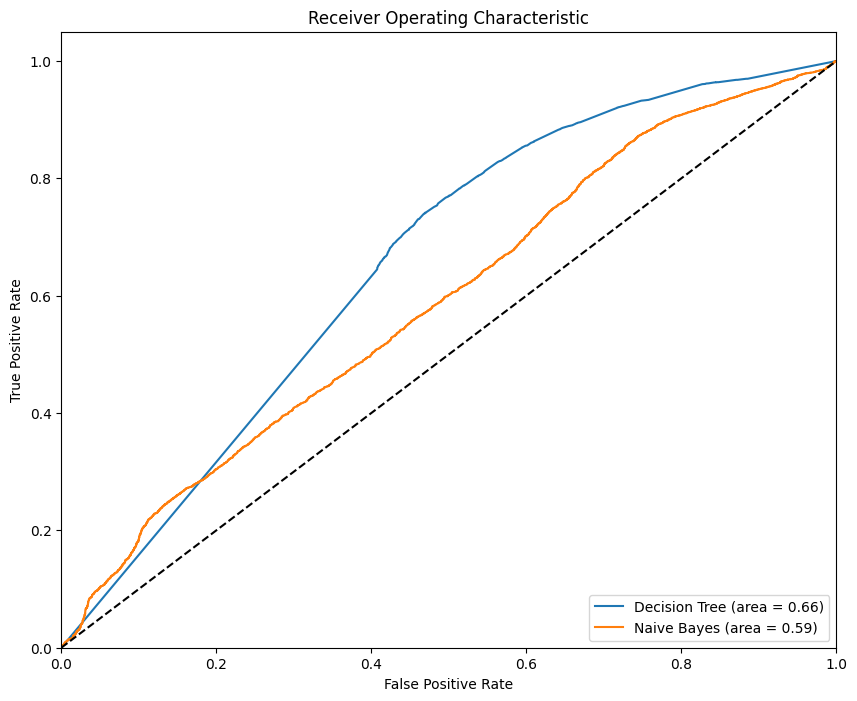

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
for name, model in models.items():
    # Get model predictions
    y_scores = model.predict_proba(
        X_test_success_scaled if name == "Naive Bayes" else X_test_success
    )[:, 1]
    fpr, tpr, _ = roc_curve(y_test_success, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Predictive Policing Model Based on Terrorist Data:
# Model Name: "Preventive Policing Forecaster"
# Objective: Use historical data to predict locations and times with high probabilities of terrorist activities, assisting in preventive policing efforts.
# Model Type: Spatiotemporal prediction.
# Algorithms: Random Forest, Gaussian Processes.

In [ ]:
# Displaying column names to identify spatiotemporal features such as latitude and longitude
spatiotemporal_features = [
    col
    for col in data.columns
    if "lat" in col.lower() or "long" in col.lower() or "date" in col.lower()
]
spatiotemporal_features

['approxdate', 'latitude', 'longitude', 'related']

In [ ]:
# Selecting spatiotemporal features and removing missing data
features_policing = ["latitude", "longitude", "iyear", "imonth", "iday"]
data_policing_subset = data[features_policing].dropna()

# Display basic information and first few rows of the dataset
print(data_policing_subset.info())
print(data_policing_subset.head())

<class 'pandas.core.frame.DataFrame'>
Index: 177134 entries, 0 to 181690
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   177134 non-null  float64
 1   longitude  177134 non-null  float64
 2   iyear      177134 non-null  int64  
 3   imonth     177134 non-null  int64  
 4   iday       177134 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 8.1 MB
None
    latitude   longitude  iyear  imonth  iday
0  18.456792  -69.951164   1970       7     2
1  19.371887  -99.086624   1970       0     0
2  15.478598  120.599741   1970       1     0
3  37.997490   23.762728   1970       1     0
4  33.580412  130.396361   1970       1     0


In [ ]:
# Splitting the data
X_train_policing, X_test_policing, y_train_policing, y_test_policing = train_test_split(
    data_policing_subset[features_policing],
    data_policing_subset["latitude"],
    test_size=0.2,
    random_state=42,
)

# Scaling features
scaler_policing = StandardScaler()
X_train_policing_scaled = scaler_policing.fit_transform(X_train_policing)
X_test_policing_scaled = scaler_policing.transform(X_test_policing)

In [ ]:
# Train Random Forest Regressor
random_forest_policing_regressor = RandomForestRegressor(random_state=42)
random_forest_policing_regressor.fit(X_train_policing, y_train_policing)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions and calculate MSE and RMSE
random_forest_policing_predictions = random_forest_policing_regressor.predict(
    X_test_policing
)
random_forest_mse = mean_squared_error(
    y_test_policing, random_forest_policing_predictions
)
random_forest_rmse = mean_squared_error(
    y_test_policing, random_forest_policing_predictions, squared=False
)

print(f"MSE: {random_forest_mse}, RMSE: {random_forest_rmse}")

MSE: 0.0003001241838739139, RMSE: 0.01732409258443033


/Users/rudra/Documents/Code/Freelancing/Python/Bigdata Viz/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


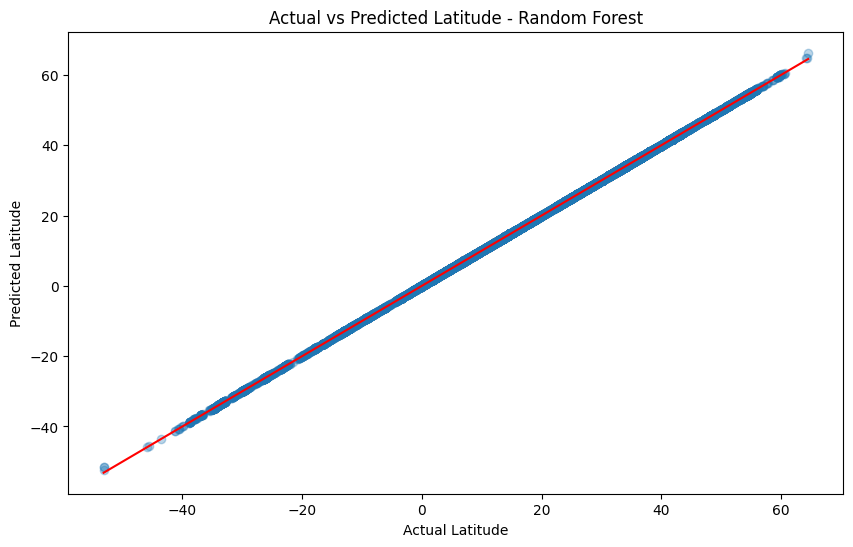

In [ ]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_policing, random_forest_policing_predictions, alpha=0.3)
plt.xlabel("Actual Latitude")
plt.ylabel("Predicted Latitude")
plt.title("Actual vs Predicted Latitude - Random Forest")
plt.plot(
    [min(y_test_policing), max(y_test_policing)],
    [min(y_test_policing), max(y_test_policing)],
    "r",
)
plt.show()